In [1]:
!jupyter nbconvert --to python data_index_2.ipynb
!jupyter nbconvert --to python model_index_2.ipynb
!jupyter nbconvert --to python evaluate_index.ipynb
# !jupyter nbconvert --to script backtest_index.ipynb


[NbConvertApp] Converting notebook data_index_2.ipynb to python
[NbConvertApp] Writing 16971 bytes to data_index_2.py
[NbConvertApp] Converting notebook model_index_2.ipynb to python
[NbConvertApp] Writing 16033 bytes to model_index_2.py
[NbConvertApp] Converting notebook evaluate_index.ipynb to python
[NbConvertApp] Writing 2857 bytes to evaluate_index.py


In [2]:
from data_index_2 import *
from model_index_2 import *
# from evaluate_index import *
import pickle  

1.2.45


In [3]:

def setup_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed) #cpu
    torch.cuda.manual_seed_all(seed)  #并行gpu
setup_seed(5)

In [4]:
# move data to GPU
device = get_device(7)

INFO:data_index_2:cuda:7


In [5]:
#get data
new_data = True
taskname = ''
GetData_filename = "GetData_" + "tmp.pkl"
label_back_days = 5
# index_code_list = ['000300.SH','000905.SH','000016.SH','000001.SH','399001.SZ']
index_code_list = ['399001.SZ','000905.SH','000001.SH','000300.SH']


dev_break_time = '2018-07-01'
test_break_time = '2019-01-01'
test_end_time = '2019-07-01'

    
if new_data:
    train_getdata = GetData_index( index_code_list = index_code_list,
                                   device=device,
                                   label_func = label_direction_2,
                                   label_back_days=label_back_days,
                                   fromtime='2009-10-01',
                                   endtime=dev_break_time)
    train_getdata.generate()

    with open('train_getdata'+taskname+'.pkl',"wb") as file:
        pickle.dump(train_getdata, file, True)
else:
    with open('train_getdata'+taskname+'.pkl',"rb") as file:
        train_getdata = pickle.load(file)

basic,dynamic,output = train_getdata.dataset
train_dataset = TensorDataset(basic,dynamic,output)

INFO:data_index_2:399001.SZ
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(2090, 26)
INFO:data_index_2:000905.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(2090, 26)
INFO:data_index_2:000001.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(2090, 26)
INFO:data_index_2:000300.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(2090, 26)
INFO:data_index_2:399001.SZ
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23


total_mv
16587451426068.0 1304089223872.0
float_mv
12790603424200.0 893294237742.0
total_share
1077732883752.0 90636840610.0
float_share
836371932919.0 58256813060.0
free_share
506793597925.0 43176213980.0
close
18098.3 6998.19


INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(2075,)
INFO:data_index_2:000905.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23


(2076, 345)
(2075, 15, 23)
total_mv
12164865017669.0 2476396592329.0
float_mv
9926125855323.0 1885573889116.0
total_share
869159702641.0 243265191629.0
float_share
709821875802.0 182931403975.0
free_share
408591889423.0 130917510261.0
close
11545.9 2749.13


INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(2075,)
INFO:data_index_2:000001.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23


(2076, 345)
(2075, 15, 23)
total_mv
47638008319041.0 16802670282978.0
float_mv
35698171591265.0 9260609757788.0
total_share
4364559793255.0 2188704928878.0
float_share
3229900670642.0 1121161962011.0
free_share
1222287339543.0 429330720815.0
close
5166.35 1950.01


INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(2075,)
INFO:data_index_2:000300.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA


(2076, 345)
(2075, 15, 23)
total_mv
40541288346486.0 15765508917837.0
float_mv
30502175649845.0 8594840502284.0
total_share
3642959285287.0 2009850318521.0
float_share
2654512864649.0 1009511804118.0
free_share
910265353984.0 351210612307.0
close
5353.75 2086.97


INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(2075,)


(2076, 345)
(2075, 15, 23)


INFO:data_index_2:torch.Size([8300, 11])
INFO:data_index_2:torch.Size([8300, 15, 23])
INFO:data_index_2:torch.Size([8300])


In [6]:
if new_data:
    dev_getdata = GetData_index(index_code_list = index_code_list,
                               device=device,
                               label_func = label_direction_2,
                               label_back_days=label_back_days,
                                fromtime=dev_break_time,
                                endtime=test_break_time,
                               normalization_parameters=train_getdata.normalization_parameters)
    dev_getdata.generate()
    
    with open('dev_getdata'+taskname+'.pkl',"wb") as file:
        pickle.dump(dev_getdata, file, True)
else:
    with open('dev_getdata'+taskname+'.pkl',"rb") as file:
        dev_getdata = pickle.load(file)
        
dev_dataset = dev_getdata.dataset

INFO:data_index_2:399001.SZ
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(91, 26)
INFO:data_index_2:000905.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(91, 26)
INFO:data_index_2:000001.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(91, 26)
INFO:data_index_2:000300.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(91, 26)
INFO:data_index_2:399001.SZ
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(76,)
INFO:data_index_2:000905.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(76,)
INFO:data_index_2:000001.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(76,

(77, 345)
(76, 15, 23)
(77, 345)
(76, 15, 23)
(77, 345)
(76, 15, 23)


INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(76,)
INFO:data_index_2:torch.Size([304, 11])
INFO:data_index_2:torch.Size([304, 15, 23])
INFO:data_index_2:torch.Size([304])


(77, 345)
(76, 15, 23)


In [7]:
# if data_class:
#     with open("GetData_index.pkl","wb") as file:
#         pickle.dump(data_class, file, True)

In [8]:
if not new_data:
    with open(GetData_filename,"rb") as file:
        pk_data = pickle.load(file)
    data_class = pk_data

In [9]:
# data_class.data_dict['000300.SH']#[['return_mkt','label']]

In [10]:
train_getdata.all_technical[0][0]

array([ 5.46114109e-01,  1.06282822e+09,  2.13188458e-01,  1.93656727e+01,
        2.67435877e+01,  1.60009398e-01,  4.84700000e+02,  7.45109321e-01,
        7.90851554e-01,  4.40623077e+02,  3.95571652e+02,  9.54600000e+02,
       -4.02000000e+01,  1.15000000e+02,  5.50100000e+02,  6.23100000e+01,
        6.00000000e-01,  2.68537000e-02,  1.02120685e+00, -1.96686482e-01,
        2.37000000e+00,  3.14000000e+00,  1.44400000e+09])

In [11]:
train_getdata.all_basic[0]

array([4.33000000e+00, 4.24000000e+01, 6.18100000e+01, 1.08000000e+00,
       1.43000000e+00, 3.76808573e-02, 2.79763269e-02, 6.80454052e-03,
       3.70013874e-03, 5.96078161e-03, 6.00607562e-01])

In [12]:
print(train_getdata.basic_input_size)
print(train_getdata.dynamic_input_size)
print(train_getdata.output_size)

11
23
2


# model

In [13]:

def train_func(sub_dataset,model):
    model.train()
    
    train_loss = 0
    train_acc = 0
    labels = []
    preds = []
    
    mysampler = RandomSampler(sub_dataset)
    data_loader = DataLoader(sub_dataset, sampler=mysampler, batch_size=train_batch_size)
    
    
    for step, batch in enumerate(data_loader):
        # train 
        optimizer.zero_grad()
        basic, dynamic, _y = batch
        #print(basic)
        #print(_y.shape)
        out = model(basic, dynamic)
        loss = loss_function(out, _y)
        #print(out)
        #print(loss.item())
        train_loss += loss.item()
        train_acc += (out.argmax(1) == _y).sum().item()
        loss.backward()
        optimizer.step()
        
        labels += _y.cpu().numpy().tolist()
        preds += out.argmax(1).cpu().numpy().tolist()
    
    scheduler.step()
    
    # evaluate
    result = {}
    result = get_eval_report('train', labels, preds)
    result['loss'] = train_loss / len(data_loader)
    result['acc'] = train_acc / len(sub_dataset)
    
    #print(preds)
    model_output = out.data.cpu().numpy()
    return result, preds, model_output

def get_eval_report(task_name, labels, preds):
    assert len(preds) == len(labels)
    # processor.get_labels()
    mcm = multilabel_confusion_matrix(labels, preds, labels=list(range(train_getdata.output_size)))
    return {
        "task": task_name,
        "mcm": mcm
    }

def show_eval_report(result,name = ''):
    logger.info("***** Eval %s results *****" %name )
    for key in (result.keys()):
        logger.info("  %s = %s", key, str(result[key]))
        

def dev_func(sub_dataset, model):
    model.eval()
    
    total_loss = 0
    total_acc = 0
    labels = []
    preds = []
     
    basic, dynamic, _y = sub_dataset
    # dev
    out = model(basic, dynamic)
    loss = loss_function(out, _y)
    total_loss += loss.item()
    total_acc += (out.argmax(1) == _y).sum().item()
    
    
    # evaluate
    result = {}
    labels += _y.cpu().numpy().tolist()
    preds += out.argmax(1).cpu().numpy().tolist()
    result = get_eval_report('dev', labels, preds)
    result['loss'] = total_loss / 1
    result['acc'] = total_acc / len(_y)
    
    #print(preds)
    model_output = out.data.cpu().numpy()
    return result, preds, model_output

   
    

In [14]:
# train setting

model = LSTM_Line_Regression(train_getdata.basic_input_size, 
                             train_getdata.dynamic_input_size, 
                             output_size=train_getdata.output_size)

ratio = pd.DataFrame(train_getdata.all_output)[0].value_counts(sort=False,normalize=True).sort_index()
weight_list = list(map(lambda x : 1/x, list(ratio)))
# weight_list[1] -= 0.5
loss_function = torch.nn.CrossEntropyLoss(weight=torch.Tensor(weight_list))
loss_function = torch.nn.CrossEntropyLoss()

# pw = torch.tensor([0.5]).to(torch.device(device))
# loss_function = torch.nn.BCEWithLogitsLoss(pos_weight=pw) #


adam_epsilon = 1e-8
weight_decay = 1e-4
LEARNING_RATE = 1e-3
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': weight_decay},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]
optimizer = torch.optim.Adam(optimizer_grouped_parameters, lr=LEARNING_RATE, eps=adam_epsilon)
# optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 100, gamma = 1)

# store perfomation
min_dev_loss = float('inf')
best_acc = -float('inf')
max_dev_f1 = -float('inf')

train_results = []
dev_results = []
lr_list = []


model.to(device)
loss_function.to(device)
weight_list


[2.132579650565262, 1.8829401088929218]

In [15]:
train_batch_size =1024

In [16]:
N_EPOCHS = 500*3
fpath = './buffer.bin'
for epoch in trange(N_EPOCHS):
    #logger.info('_____ Epoch %s begin _____'% epoch)
    res , preds, model_output  =train_func(train_dataset,model)
    train_results.append(res)
    
    res , preds, model_output = dev_func(dev_dataset,model)
    dev_results.append(res)
    
    lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
    
    dev_acc = res['acc']
    if dev_acc > best_acc:
        #tqdm.write("@@@@@ Save MAX_ACC model @@@@@")
        #logger.info('file_path = %S'% output_model_file)
        best_acc = dev_acc
        torch.save(model,fpath)
        acc_model = torch.load(fpath)
        acc_idx = epoch

    dev_loss = res['loss']
    if dev_loss < min_dev_loss:
        #tqdm.write("@@@@@ Save MIN_LOSS model @@@@@")
        #logger.info('file_path = %S'% output_model_file)
        min_dev_loss = dev_loss
        torch.save(model,fpath)
        loss_model = torch.load(fpath)
        loss_idx = epoch
    dev_f1 = get_F1_score(res['mcm'][1].ravel())
    if dev_f1 >= max_dev_f1:
        #tqdm.write("@@@@@ Save MIN_LOSS model @@@@@")
        #logger.info('file_path = %S'% output_model_file)
        max_dev_f1 = dev_f1
        torch.save(model,fpath)
        f1_model = torch.load(fpath)
logger.info("_____ Train finish _____")



  0%|          | 0/1500 [00:00<?, ?it/s]/home/wy506wd/index_prediction/model_index_2.py:464: RuntimeWarning: invalid value encountered in long_scalars
  P_precision = tp / (tp + fp)
100%|██████████| 1500/1500 [06:55<00:00,  3.72it/s]
INFO:model_index_2:_____ Train finish _____


In [17]:
# plot LEARNING_RATE
# plt.plot(range(len(lr_list)),lr_list,color = 'r')
# plt.show()

INFO:model_index_2:
TRAIN
0    0.468916
1    0.531084
Name: 0, dtype: float64
INFO:model_index_2:
DEV
0    0.526316
1    0.473684
Name: 0, dtype: float64


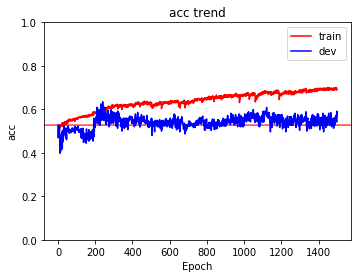

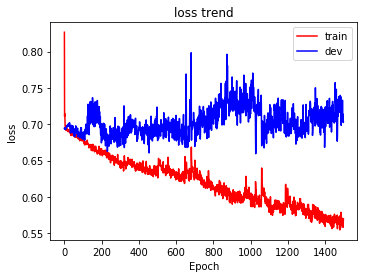

/home/wy506wd/index_prediction/model_index_2.py:454: RuntimeWarning: invalid value encountered in long_scalars
  return tp / (tp + fp)


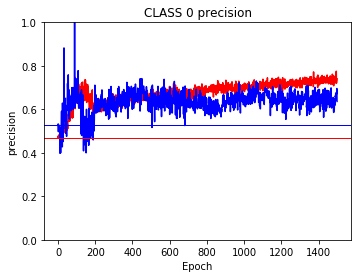

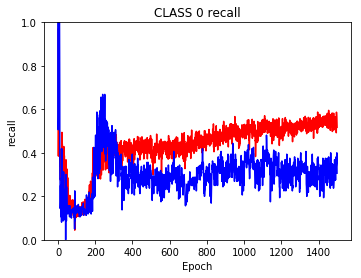

/home/wy506wd/index_prediction/model_index_2.py:464: RuntimeWarning: invalid value encountered in long_scalars
  P_precision = tp / (tp + fp)


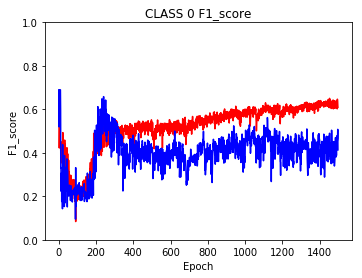

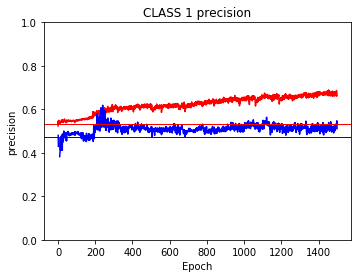

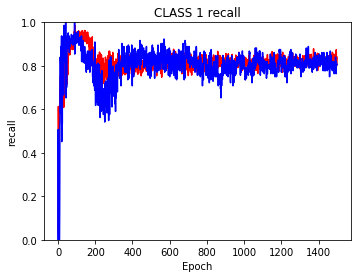

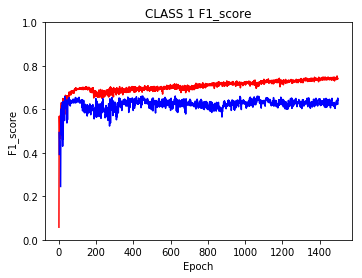

In [18]:
plt.rcParams['figure.figsize'] = (5.5, 4.0)
logger.info('\nTRAIN\n'+str(get_class_ratio(train_getdata.all_output)))
logger.info('\nDEV\n'+str(get_class_ratio(dev_getdata.all_output)))

show_map(train_results,dev_results, 'acc', train_getdata.all_output, dev_getdata.all_output)
show_map(train_results,dev_results,'loss', train_getdata.all_output, dev_getdata.all_output)

for i in range(train_getdata.output_size):
    plt_class(train_results,dev_results, train_getdata.all_output, dev_getdata.all_output, i)

In [19]:

print('true_label')
_, _, o = dev_dataset
b = pd.DataFrame(o.cpu().numpy())
print(b[0].value_counts(sort=False, normalize=True).sort_index())

print('model_preds')
a = pd.DataFrame(preds)
print(a[0].value_counts(sort=False,normalize=True).sort_index())


print('dev')
print('acc = %.3f'% dev_results[loss_idx]['acc'])
for i in range(train_getdata.output_size):
    print('class %s F1_score = %.3f'%(i,get_F1_score(dev_results[loss_idx]['mcm'][i].ravel())))
    print('class %s Precision = %.3f'%(i,get_precision(dev_results[loss_idx]['mcm'][i].ravel())))
    print('class %s Recall = %.3f'%(i,get_recall(dev_results[loss_idx]['mcm'][i].ravel())))
loss_idx

true_label
0    0.526316
1    0.473684
Name: 0, dtype: float64
model_preds
0    0.253289
1    0.746711
Name: 0, dtype: float64
dev
acc = 0.569
class 0 F1_score = 0.423
class 0 Precision = 0.716
class 0 Recall = 0.300
class 1 F1_score = 0.656
class 1 Precision = 0.527
class 1 Recall = 0.868


1028

In [29]:
print('dev')
print('acc = %.3f'% dev_results[acc_idx]['acc'])
for i in range(train_getdata.output_size):
    print('class %s Precision = %.3f'%(i,get_precision(dev_results[acc_idx]['mcm'][i].ravel())))
    print('class %s Recall = %.3f'%(i,get_recall(dev_results[acc_idx]['mcm'][i].ravel())))
    print('class %s F1_score = %.3f'%(i,get_F1_score(dev_results[acc_idx]['mcm'][i].ravel())))

dev
acc = 0.635
class 0 Precision = 0.648
class 0 Recall = 0.669
class 0 F1_score = 0.658
class 1 Precision = 0.619
class 1 Recall = 0.597
class 1 F1_score = 0.608


# BACKTEST

In [21]:
test_getdata = GetData_index(index_code_list = index_code_list,
                           device=device,
                           label_func = label_direction_2,
                           label_back_days=label_back_days,
                            fromtime=test_break_time,
                            endtime=test_end_time,
                            normalization_parameters=train_getdata.normalization_parameters)

test_dataset = test_getdata.generate()
with open('test_getdata'+taskname+'.pkl',"wb") as file:
    pickle.dump(test_getdata, file, True)

INFO:data_index_2:399001.SZ
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(86, 26)
INFO:data_index_2:000905.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(86, 26)
INFO:data_index_2:000001.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(86, 26)
INFO:data_index_2:000300.SH
INFO:data_index_2:label_back_days = 5
INFO:data_index_2:(86, 26)
INFO:data_index_2:399001.SZ
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(71,)
INFO:data_index_2:000905.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(71,)
INFO:data_index_2:000001.SH
INFO:data_index_2:GETTING BASIC DATA
INFO:data_index_2:GETTING TECHNICAL DATA
INFO:data_index_2:dynamic_input_size = 23
INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(71,

(72, 345)
(71, 15, 23)
(72, 345)
(71, 15, 23)
(72, 345)
(71, 15, 23)


INFO:data_index_2:GETTING OUTPUT DATA
INFO:data_index_2:(71,)
INFO:data_index_2:torch.Size([284, 11])
INFO:data_index_2:torch.Size([284, 15, 23])
INFO:data_index_2:torch.Size([284])


(72, 345)
(71, 15, 23)


In [22]:

plt.rcParams['figure.figsize'] = (15, 5.0)
def simple_backtest(df,preds,ndays):
    revenue = 1
    buy_point = []
    amounts = [revenue]
    i = 1 #date_index
    return_mkt = df['return_mkt']
    
    while i < len(preds)-1:
        label = preds[i]
        if label == 1:
            for r in return_mkt[i+1 : i+1+ndays]:
                revenue *= 1 + r
                amounts.append(revenue)
            buy_point.append(i)
            i += ndays
        else:
#             revenue *= 1 - return_mkt[i+1]
            amounts.append(revenue)
            i += 1
    return amounts, buy_point

def rolling_backtest(df,preds,ndays):
    revenue = 1
    buy_point = []
    amounts = [revenue]
    i = 1 #date_index
    return_mkt = df['return_mkt']
    while i < len(preds)-1:
        label = preds[i]
        if label == 1:
            for r in return_mkt[i+1 : i+1+ndays]:
                revenue *= 1 + r
                amounts.append(revenue)
            buy_point.append(i)
            i += ndays
        else:
#             revenue *= 1 - return_mkt[i+1]
            amounts.append(revenue)
            i += 1
    return amounts, buy_point
    
def plt_amounts(amounts,buy_point,close,ndays,backtest_index):
    close = close.map(lambda x : x/close[0])
    #plt.ylim(0.7,1.3)
    plt.title(f"{backtest_index} trend") 
    plt.plot(range(1,len(amounts)+1),amounts,color='r',label='return')
    plt.plot(range(len(close)),close,color='b',label='market') 
    plt.plot(buy_point,[close[i] for i in buy_point],'x',color='red',label='buy_point')
    sell_point = list(map(lambda x : x+ndays,buy_point[:-1]))
    plt.plot(sell_point,[close[i] for i in sell_point],'.',color='g',label='sell_point')
    plt.legend()
    plt.show()
    print(f'final return  = {amounts[-1]}')
    print(f'market return = {close[-1]}')
    print(f'Relative Return = {amounts[-1]-close[-1]}')
#     return sell_point



In [23]:
# dev_getdata.features['000300.SH']

In [24]:
def run_backtest(my_getdata, model):
    for backtest_index in my_getdata.index_code_list:
        test_in = my_getdata.get_input_by_index(backtest_index)
        res, preds, model_output = dev_func(test_in, model)
        df = test_getdata.data_dict[backtest_index][-len(preds):]

        amounts, buy_point = simple_backtest(df,preds,label_back_days)
        plt_amounts(amounts,buy_point,df['close'],label_back_days,backtest_index)
        

In [25]:
# run_backtest(dev_getdata,acc_model)

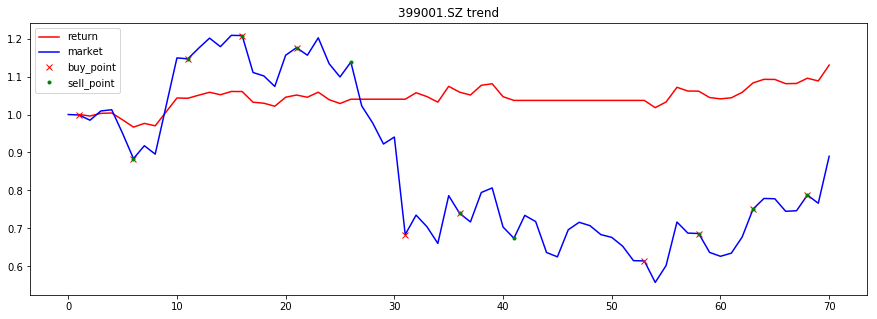

final return  = 1.1301261330632937
market return = 0.8900022493708787
Relative Return = 0.240123883692415


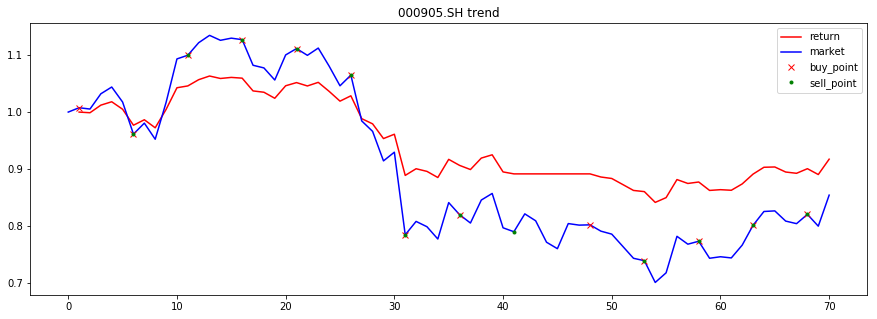

final return  = 0.9173907335278881
market return = 0.854319507276394
Relative Return = 0.06307122625149408


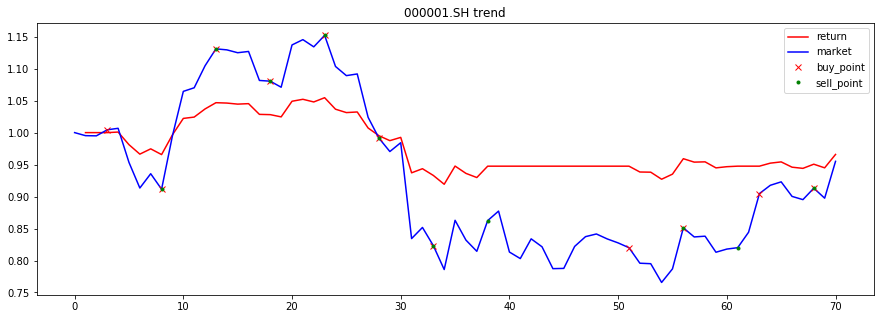

final return  = 0.965872699428781
market return = 0.9550597081323435
Relative Return = 0.010812991296437424


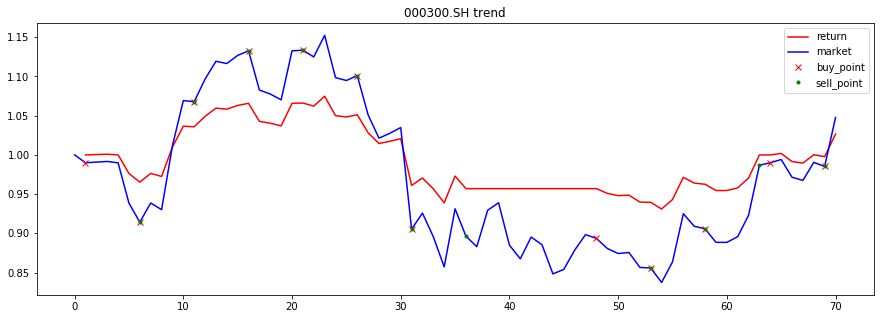

final return  = 1.0264625944927375
market return = 1.0476319994560226
Relative Return = -0.02116940496328512


In [26]:
run_backtest(test_getdata,acc_model)

# save and test

In [ ]:
assert False

In [ ]:
output_model_path = './index_1p_0.605.bin'

In [ ]:
# torch.save(model, output_model_path)

In [ ]:
# load model 
mymodel = torch.load(output_model_path)
model = mymodel
model.to(device)

In [ ]:
res , preds, model_output = dev_func(dev_dataset,mymodel)
dev_results.append(res)

In [ ]:
dev_results

In [ ]:
for i in range(train_getdata.output_size):
    print('class %s F1_score = %.3f'%(i,get_F1_score(dev_results[-1]['mcm'][i].ravel())))
    print('class %s Precision = %.3f'%(i,get_precision(dev_results[-1]['mcm'][i].ravel())))